In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Imports_Exports_Dataset.csv")
df.head()

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Quantity,Value,Date,Customs_Code,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,Machinery,1979.0,9506.57,7/12/2023,620537,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,Clothing,5763.0,7100.91,4/4/2023,927600,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,Furniture,NaN,7226.42,9/5/2022,996084,0.00
3,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,Air,Juliebury,Electronics,2622.0,2817.29,3/4/2023,555981,4406.74
4,23a7711a-8133-4876-b7eb-dcd9e87a1613,New Zealand,positive,Export,Sea,East Randall,Machinery,6975.0,657.80,23-07-2021,741778,1497.16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Shipping_Method  15000 non-null  object 
 5   Port             15000 non-null  object 
 6   Category         15000 non-null  object 
 7   Quantity         14993 non-null  float64
 8   Value            14993 non-null  float64
 9   Date             15000 non-null  object 
 10  Customs_Code     15000 non-null  int64  
 11  Weight           14993 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [4]:
print(df.isnull().sum())
print("---------------")
print(df.isnull().sum().sum())

Transaction_ID     0
Country            0
Product            0
Import_Export      0
Shipping_Method    0
Port               0
Category           0
Quantity           7
Value              7
Date               0
Customs_Code       0
Weight             7
dtype: int64
---------------
21


In [5]:
df.isna().sum()

Transaction_ID     0
Country            0
Product            0
Import_Export      0
Shipping_Method    0
Port               0
Category           0
Quantity           7
Value              7
Date               0
Customs_Code       0
Weight             7
dtype: int64

In [6]:
df.describe()

,Quantity,Value,Customs_Code,Weight
count,14993.000000,14993.000000,15000.00000,14993.000000
mean,4981.713666,5032.743110,549507.95920,2491.758419
std,2866.023597,2857.714215,260886.91886,1451.623798
min,1.000000,102.120000,100041.00000,0.000000
25%,2518.000000,2552.030000,325635.50000,1242.810000
50%,4960.000000,5044.710000,545432.00000,2476.440000
75%,7459.000000,7505.180000,777988.00000,3746.900000
max,10000.000000,9999.130000,999964.00000,4999.930000


In [7]:
df["Customs_Code"] = df["Customs_Code"].astype(object)
df.head()

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Quantity,Value,Date,Customs_Code,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,Machinery,1979.0,9506.57,7/12/2023,620537,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,Clothing,5763.0,7100.91,4/4/2023,927600,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,Furniture,NaN,7226.42,9/5/2022,996084,0.00
3,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,Air,Juliebury,Electronics,2622.0,2817.29,3/4/2023,555981,4406.74
4,23a7711a-8133-4876-b7eb-dcd9e87a1613,New Zealand,positive,Export,Sea,East Randall,Machinery,6975.0,657.80,23-07-2021,741778,1497.16


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Shipping_Method  15000 non-null  object 
 5   Port             15000 non-null  object 
 6   Category         15000 non-null  object 
 7   Quantity         14993 non-null  float64
 8   Value            14993 non-null  float64
 9   Date             15000 non-null  object 
 10  Customs_Code     15000 non-null  object 
 11  Weight           14993 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.4+ MB


In [9]:
num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        num_col.append(i)
    else:
        cat_col.append(i)
print('NUM_COL:',num_col)
print('==============================================')
print('CAT_COL:',cat_col)

NUM_COL: ['Quantity', 'Value', 'Weight']
CAT_COL: ['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Shipping_Method', 'Port', 'Category', 'Date', 'Customs_Code']


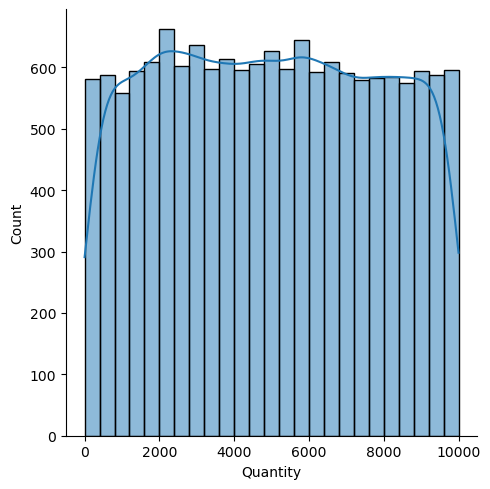

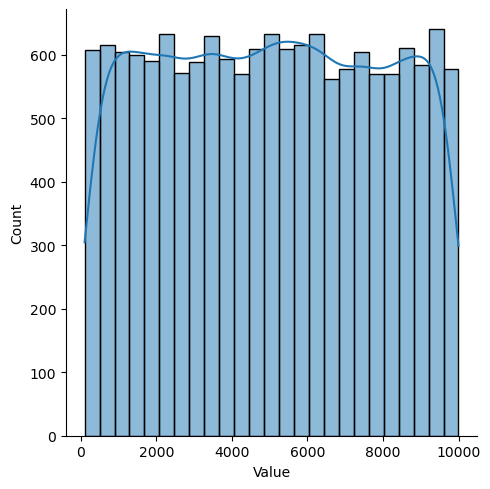

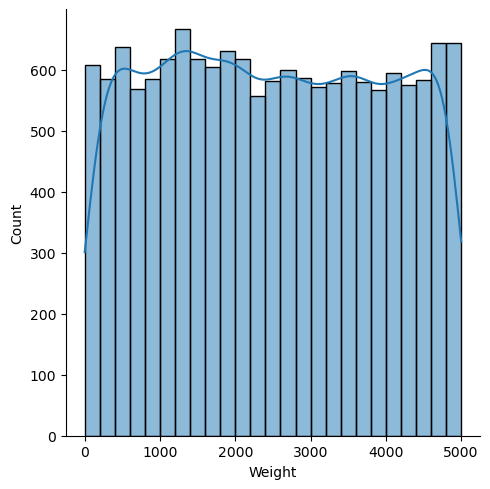

In [10]:
def distplots(num_col):
    sns.displot(df[num_col], kde=True, palette=True)
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

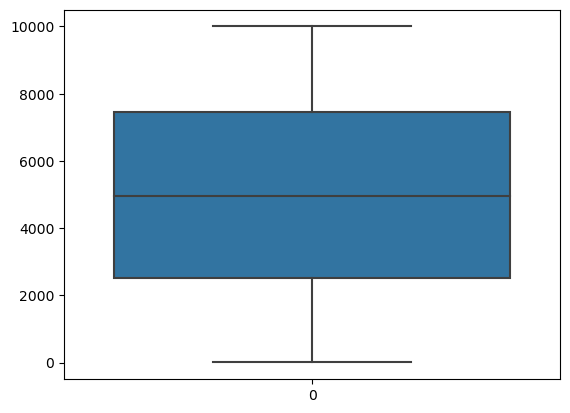

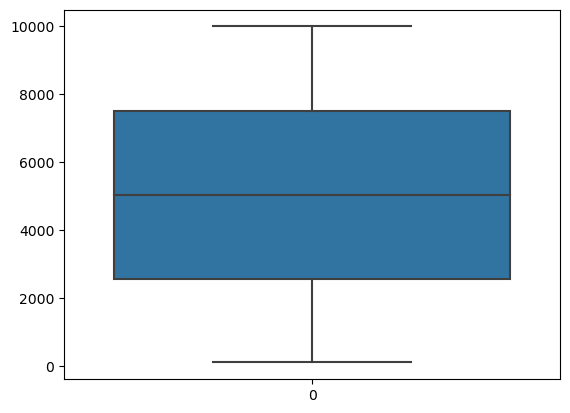

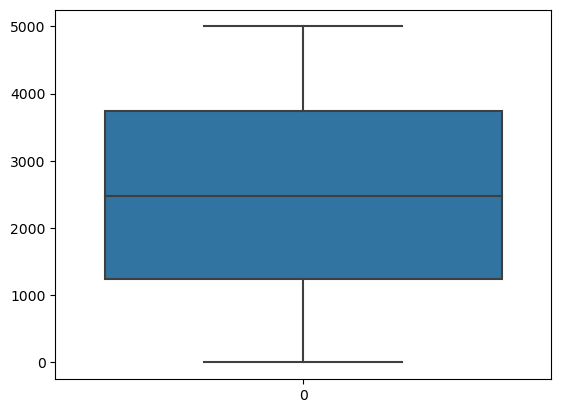

In [11]:
def boxplots(num_col):
    sns.boxplot(df[num_col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns):
    boxplots(i)

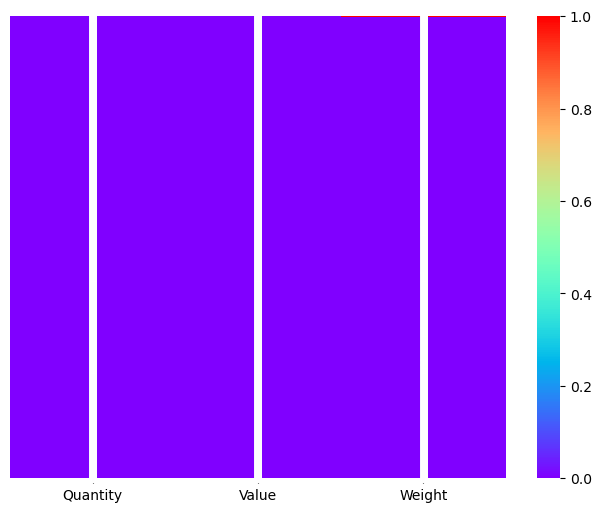

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity','Value','Weight']].isnull(), cmap='rainbow', cbar=True, annot=True, yticklabels=False)
plt.show()

In [13]:
df_new = df[['Quantity','Value','Weight']].copy()
df_new.head()

,Quantity,Value,Weight
0,1979.0,9506.57,4248.65
1,5763.0,7100.91,4340.81
2,NaN,7226.42,0.00
3,2622.0,2817.29,4406.74
4,6975.0,657.80,1497.16


In [14]:
from sklearn.impute import KNNImputer

In [15]:
imputer=KNNImputer(n_neighbors=10)
data_imputed=pd.DataFrame(imputer.fit_transform(df_new),columns=df_new.columns)
data_imputed.head(3)

,Quantity,Value,Weight
0,1979.0,9506.57,4248.65
1,5763.0,7100.91,4340.81
2,6147.9,7226.42,0.00


In [16]:
data_imputed.isnull().sum()

Quantity    0
Value       0
Weight      0
dtype: int64

In [17]:
df_cat = df.drop(['Quantity','Value','Weight'], axis=1)
df_cat.head()

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Date,Customs_Code
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,Machinery,7/12/2023,620537
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,Clothing,4/4/2023,927600
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,Furniture,9/5/2022,996084
3,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,Air,Juliebury,Electronics,3/4/2023,555981
4,23a7711a-8133-4876-b7eb-dcd9e87a1613,New Zealand,positive,Export,Sea,East Randall,Machinery,23-07-2021,741778


In [18]:
df1 = pd.concat([df_cat, data_imputed], axis=1)
df1.head()

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Date,Customs_Code,Quantity,Value,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,Machinery,7/12/2023,620537,1979.0,9506.57,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,Clothing,4/4/2023,927600,5763.0,7100.91,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,Furniture,9/5/2022,996084,6147.9,7226.42,0.00
3,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,Air,Juliebury,Electronics,3/4/2023,555981,2622.0,2817.29,4406.74
4,23a7711a-8133-4876-b7eb-dcd9e87a1613,New Zealand,positive,Export,Sea,East Randall,Machinery,23-07-2021,741778,6975.0,657.80,1497.16


In [19]:
df1.isnull().sum().sum()

0

In [20]:
num_col = []
cat_col = []
for i in df1.columns:
    if df1[i].dtypes == 'int64' or df1[i].dtypes == 'float64':
        num_col.append(i)
    else:
        cat_col.append(i)
print(num_col)
print('#================================================#')
print(cat_col)

['Quantity', 'Value', 'Weight']
#================================================#
['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Shipping_Method', 'Port', 'Category', 'Date', 'Customs_Code']


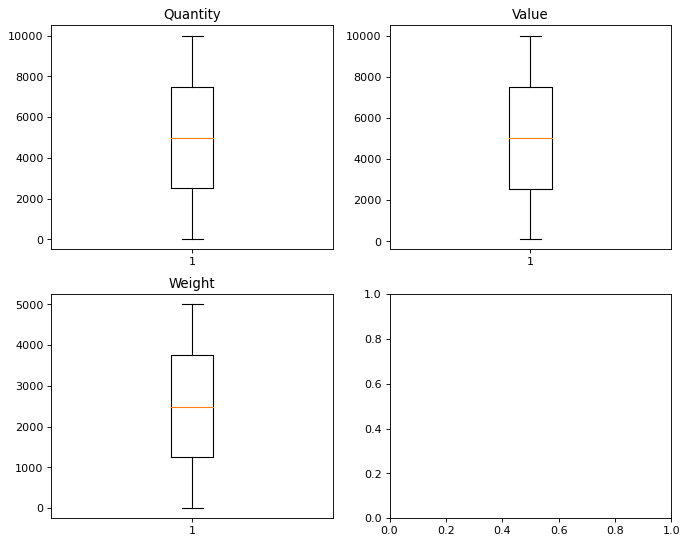

In [21]:
f, ax = plt.subplots(2,2, figsize=(10,8), dpi=80)
index = 0
try:
    for i in range(2):
        for j in range(2):
            ax[i,j].boxplot(df1[num_col[index]])
            ax[i,j].set_title(num_col[index])
            index+=1
except:
    pass
plt.show()

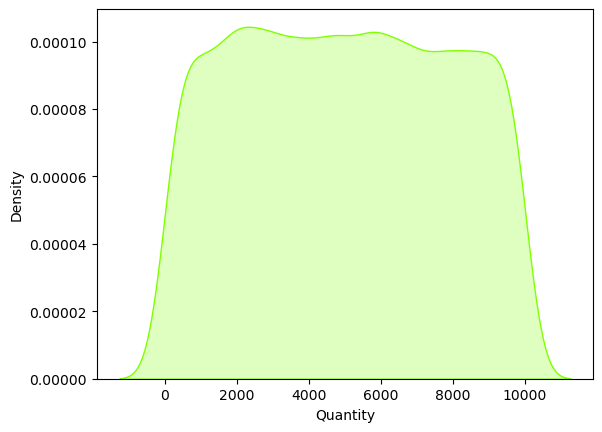

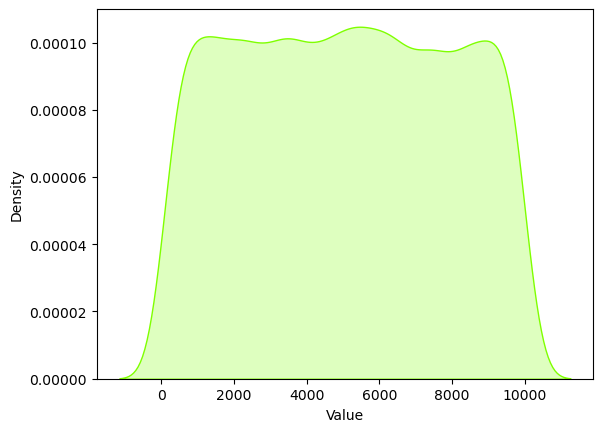

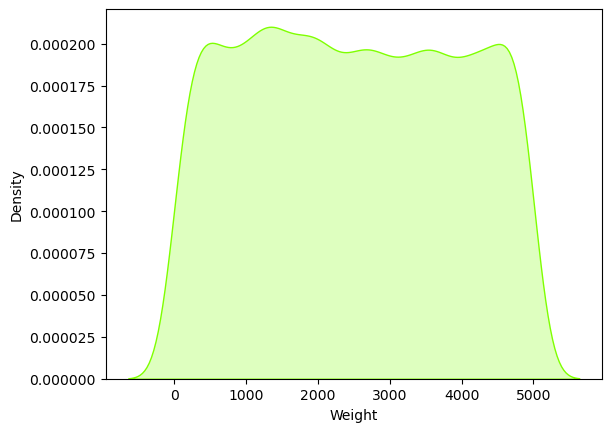

In [22]:
def distplots(num_col):
    sns.kdeplot(df1[num_col],color='#7FFF00',fill=True, palette=True)
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

In [23]:
cat_col

['Transaction_ID',
 'Country',
 'Product',
 'Import_Export',
 'Shipping_Method',
 'Port',
 'Category',
 'Date',
 'Customs_Code']

In [24]:
Category_all=[]
Percentage=[]
for i in df1.Category.value_counts().index:
    a=len(df1[(df1.Category==i) & (df1.Import_Export=="Import")])
    b=len(df1[(df1.Category==i) & (df1.Import_Export=='Export')])
    c=len(df1[df1.Category==i])
    Percentage.append((a+b)/c*100)
    Category_all.append(i)
    print(i,'in percent =',round((a+b)/c*100),'%')

Clothing in percent = 100 %
Furniture in percent = 100 %
Electronics in percent = 100 %
Machinery in percent = 100 %
Toys in percent = 100 %


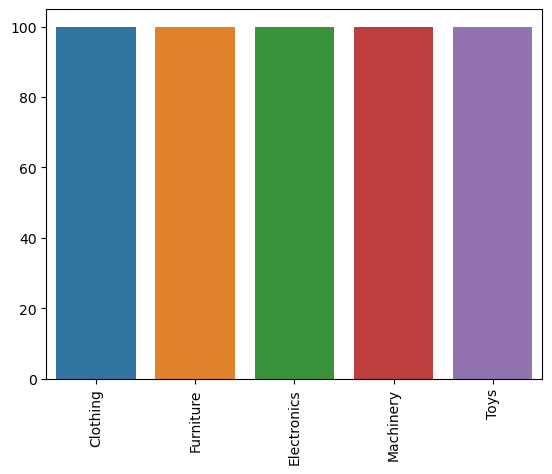

In [25]:
sns.barplot(x=Category_all, y=Percentage)
plt.xticks(rotation=90)
plt.show()

In [26]:
df1[["Import_Export",'Product']].groupby("Import_Export").agg("count")

,Product
Import_Export,
Export,7431
Import,7569


In [27]:
df1[["Import_Export","Country","Product"]].groupby(["Import_Export","Country"]).agg("count")

Product
Import_Export Country                   
Export        Afghanistan             23
              Albania                 36
              Algeria                 30
              American Samoa          27
              Andorra                 20
...                                  ...
Import        Wallis and Futuna       36
              Western Sahara          34
              Yemen                   28
              Zambia                  27
              Zimbabwe                29

[486 rows x 1 columns]

In [28]:
df1[["Value","Import_Export","Category"]].groupby(["Import_Export","Category"]).agg("count")

Value
Import_Export Category          
Export        Clothing      1491
              Electronics   1534
              Furniture     1496
              Machinery     1454
              Toys          1456
Import        Clothing      1557
              Electronics   1487
              Furniture     1528
              Machinery     1556
              Toys          1441

In [29]:
df1[["Product","Quantity","Value"]].groupby(["Product","Quantity"]).agg([min,max])

Value         
                       min      max
Product  Quantity                  
American 740.0     2165.16  2165.16
         1076.0    2442.68  2442.68
         2113.0    4415.97  4415.97
         2548.0    7077.48  7077.48
         3148.0    1498.06  1498.06
...                    ...      ...
yourself 6842.0    2128.33  2128.33
         6912.0    3190.19  3190.19
         9614.0    7824.75  7824.75
         9654.0    1647.26  1647.26
         9700.0    1484.88  1484.88

[14986 rows x 2 columns]

In [34]:
x=df1.groupby(by='Import_Export').agg(Quantity=('Quantity','mean'),Value=('Value','mean'),
                            Weight=('Weight','mean'))
print(x)

                  Quantity        Value       Weight
Import_Export                                       
Export         4963.438528  5038.881121  2491.921513
Import         4999.468886  5026.717268  2491.591563


Text(0.5, 1.0, 'Weight')

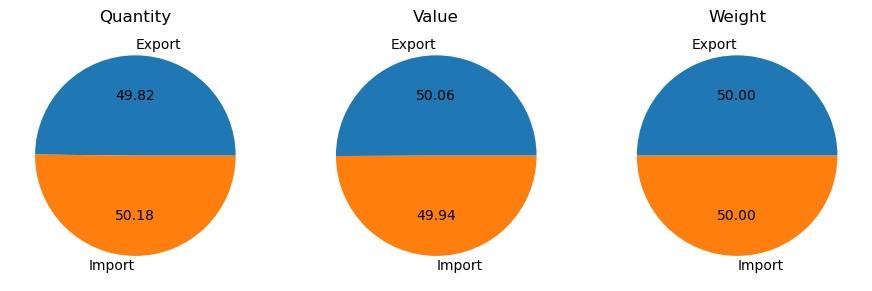

In [35]:
plt.figure(figsize=(11,9))
plt.subplot(1,3,1)
plt.pie(labels=x.index,x=x['Quantity'].values,autopct='%.2f')
plt.title('Quantity')

plt.subplot(1,3,2)
plt.pie(labels=x.index,x=x['Value'].values,autopct='%.2f')
plt.title('Value')

plt.subplot(1,3,3)
plt.pie(labels=x.index,x=x['Weight'].values,autopct='%.2f')
plt.title('Weight')

In [36]:
df1.head(3)

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Date,Customs_Code,Quantity,Value,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,Machinery,7/12/2023,620537,1979.0,9506.57,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,Clothing,4/4/2023,927600,5763.0,7100.91,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,Furniture,9/5/2022,996084,6147.9,7226.42,0.00


In [37]:
print(df1["Category"].unique())

['Machinery' 'Clothing' 'Furniture' 'Electronics' 'Toys']


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
def Label_encode(feat):
    le.fit(feat)
    print(feat.name, le.classes_)
    return le.transform(feat)

In [40]:
df1["Category"]=Label_encode(df1["Category"])

Category ['Clothing' 'Electronics' 'Furniture' 'Machinery' 'Toys']


In [41]:
df1.head(3)

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Date,Customs_Code,Quantity,Value,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,3,7/12/2023,620537,1979.0,9506.57,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,0,4/4/2023,927600,5763.0,7100.91,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,2,9/5/2022,996084,6147.9,7226.42,0.00


In [42]:
df1["Category"].value_counts()

0    3048
2    3024
1    3021
3    3010
4    2897
Name: Category, dtype: int64

In [43]:
print(df1["Shipping_Method"].unique())
print("------------------")
print(df1["Shipping_Method"].value_counts())

['Air' 'Sea' 'Land']
------------------
Sea     5054
Air     4995
Land    4951
Name: Shipping_Method, dtype: int64


In [44]:
df1["Import_Export"]=Label_encode(df1["Import_Export"])
df1["Shipping_Method"]=Label_encode(df1["Shipping_Method"])

Import_Export ['Export' 'Import']
Shipping_Method ['Air' 'Land' 'Sea']


In [45]:
df1.head(3)

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Date,Customs_Code,Quantity,Value,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,0,0,Robertbury,3,7/12/2023,620537,1979.0,9506.57,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,0,0,Shahport,0,4/4/2023,927600,5763.0,7100.91,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,0,0,Adamfort,2,9/5/2022,996084,6147.9,7226.42,0.00


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  int32  
 4   Shipping_Method  15000 non-null  int32  
 5   Port             15000 non-null  object 
 6   Category         15000 non-null  int32  
 7   Date             15000 non-null  object 
 8   Customs_Code     15000 non-null  object 
 9   Quantity         15000 non-null  float64
 10  Value            15000 non-null  float64
 11  Weight           15000 non-null  float64
dtypes: float64(3), int32(3), object(6)
memory usage: 1.2+ MB


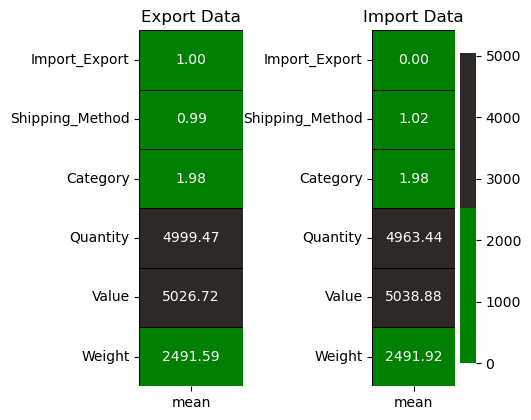

In [47]:
colors = ['#008000', '#2D2926']

Export = df1[df1['Import_Export']==1].describe().T
Import = df1[df1['Import_Export']==0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,4))
plt.subplot(1,2,1)
sns.heatmap(Export[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('Export Data')

plt.subplot(1,2,2)
sns.heatmap(Import[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=True, fmt='.2f')
plt.title('Import Data')

fig.tight_layout(pad=0)